Monthly C02 Levels (1959 - 2025)


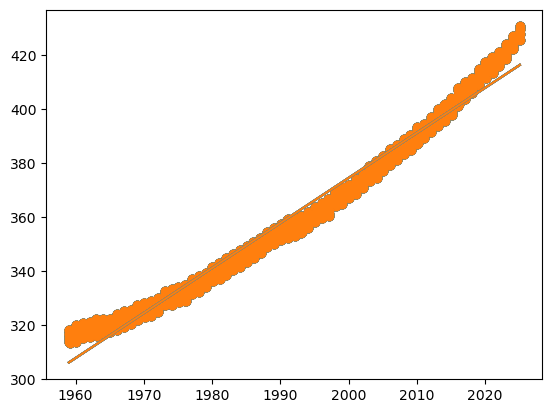

In [32]:
#Data Science and Machine Learning Project
#Authour: Tadgh Fitzpatrick
#Authour Student Number:  C00282704
#Creation Date:03/11/2025
#Description:
#This Graph Displays the global temprature level over the last 60 years

import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

print("Monthly C02 Levels (1959 - 2025)")

data = pd.read_csv("./DataSets/Monthly C02 Levels.csv") #DataSet from https://climatedata.imf.org/pages/climatechange-data
year = 1961
x = []
y = []

#Removes 1958 as it doesn't have all of its months
data = data.drop(index=range(10))

#Creates Subset of Data tha contains the amount of CO2 per Million, not as percentage of the atmosphere
subset = data[data["Unit"] != "Percent"]

for row in subset:
    #Removes "M"(Month) from all Dates and turns all Dates into Floating point integers
    x = subset["Date"].str.replace("M", ".").astype(float).tolist()
    
    y = subset['Value'].tolist()

    x = np.array(x)
    y = np.array(y)
        
    model.fit(x[:, np.newaxis], y)
        
    xfit = np.linspace(min(x), max(x), len(x))
    yfit = model.predict(xfit[:, np.newaxis])
        
    plt.scatter(x, y)
    plt.plot(xfit, yfit);